In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
#import parquet 
from fastparquet import write
from collections import defaultdict
import os.path

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

In [2]:
res = pd.read_parquet('../../data_collection/data/results_sweden.parquet', engine='fastparquet')

In [3]:
frames_root = '../../../../youtube_video_frames/'

In [4]:
# Function to get the row with the maximum confidence level for a given Video_id
def get_max_confidence_row(video_id, df):
    filtered_df = df[df['Video_id'] == video_id]
    if not filtered_df.empty:
        max_row = filtered_df[filtered_df['confidence_level'] == filtered_df['confidence_level'].max()]
        return max_row  # Return as a DataFrame
    else:
        return pd.DataFrame()  # Return an empty DataFrame if the Video_id is not found

def get_frame(root, country, video_id, res):
    
    if res.empty:
        print('DataFrame is empty!')
        return []
    else:
        img_max = get_max_confidence_row(video_id, res)
        img_max['x_center'] = img_max['x_center'].astype(float)
        img_max['y_center'] = img_max['x_center'].astype(float)
        img_max['width'] = img_max['width'].astype(float)
        img_max['height'] = img_max['height'].astype(float)
        img_max['confidence_level'] = img_max['confidence_level'].astype(float)
        
        img_max_path = root + country +'/'+ img_max['Channel'] +'/'+ video_id +'/'+ img_max['Frame'] + '.jpg'

        return img_max, img_max_path.values[0]

In [5]:
def xywh2xyxy(x,y,w,h,w_img,h_img):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    x1 = int(w_img*(x - (w / 2)))  # top left x
    y1 = int(h_img*(y-(2*h/2)))  # top left y
    x2 = int(w_img*(x + (w / 2)))  # bottom right x
    y2 = int(h_img*(y+(h/4)))
    return x1,y1,x2,y2

def get_coordinates(row):
    # Extract bounding box coordinates, class label, and confidence score
    x, y, w, h = row['x_center'].values[0], row['y_center'].values[0], \
                                        row['width'].values[0], row['height'].values[0]
    class_label = row['class_label'].values[0]
    confidence = row['confidence_level'].values[0]
    
    # Get coordinates 
    x1,y1,x2,y2 = xywh2xyxy(x,y,w,h,image.shape[1],image.shape[0])
    
    return x1,y1,x2,y2,class_label,confidence 

def plot_box(img, box_info):
    
    # Get coordinates
    x1,y1,x2,y2, class_label, confidence = get_coordinates(box_info)
    
    # Draw bounding box on the image
    color = (255,191,0)  # BGR color (green)
    thickness = 4
    cv2.rectangle(img, (x2, y1), (x1, y2), color, thickness)
    
    # Add class label and confidence score to the image
    label = f'{class_label} ({confidence:.2f})'
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, color, thickness)

    # Display the resulting image using matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

In [6]:
img_max, img = get_frame('../../../../youtube_video_frames/', 'sweden', 'o5CHx6-4_nc', res)

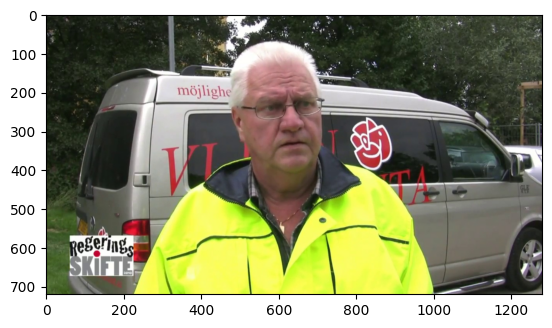

In [7]:
# Load and display the image (assuming you have the image file)
image = cv2.imread(img)  # Replace with your image file
#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

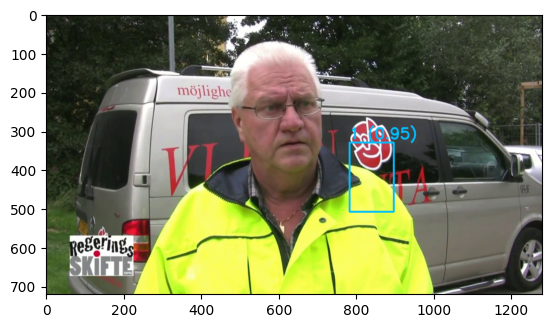

In [8]:
plot_box(image, img_max)

In [9]:
# Get image info
img_max, img = get_frame('../../../../youtube_video_frames/', 'sweden', 'wqLABHlwXt8', res)

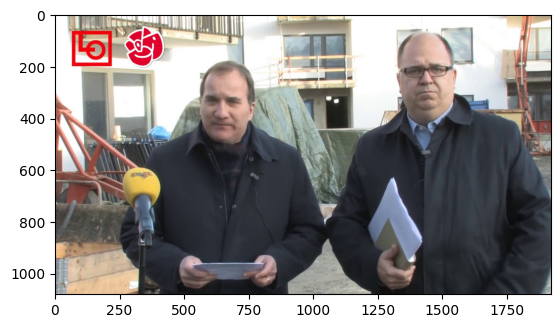

In [10]:
# Load and display the image (assuming you have the image file)
image = cv2.imread(img)  # Replace with your image file
#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

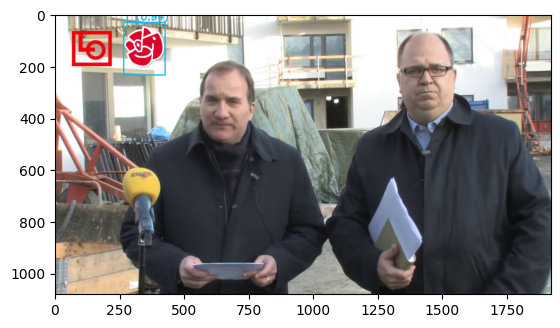

In [11]:
plot_box(image, img_max)

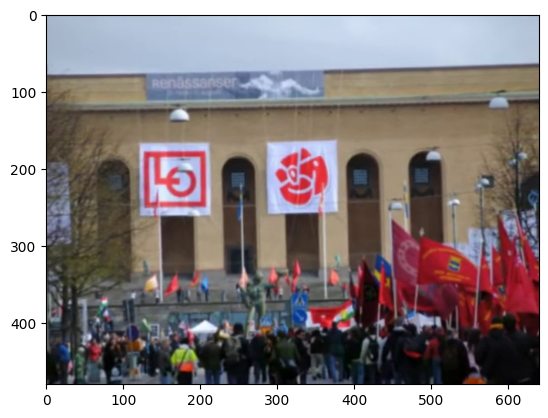

In [12]:
# Get image info
img_max, img = get_frame('../../../../youtube_video_frames/', 'sweden', 'kE4_FH-B_LQ', res)
# Load and display the image (assuming you have the image file)
image = cv2.imread(img)  # Replace with your image file
#Show the image with matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

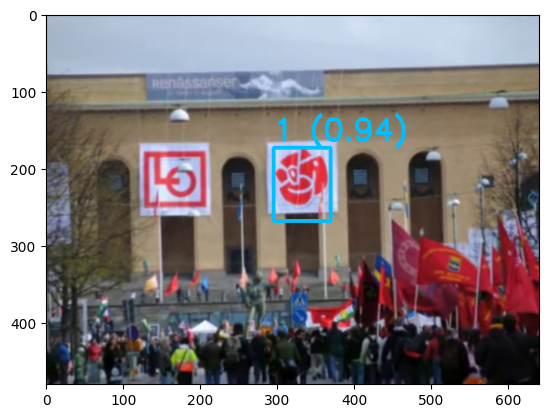

In [13]:
plot_box(image, img_max)